# Reading the dataset into the python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [7]:
data.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [8]:
# Dropping non-predictive columns like Channel and Region

x = data.drop(['Channel','Region'], axis = 1)

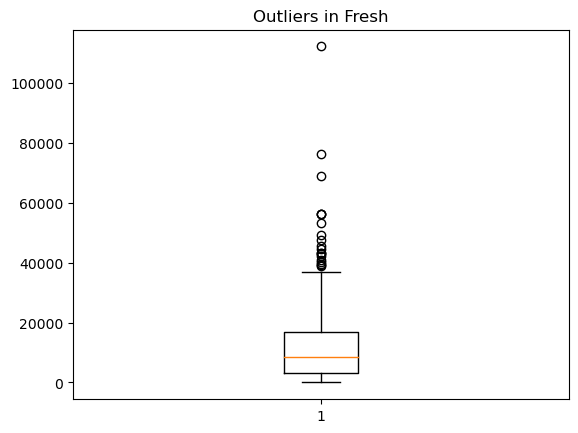

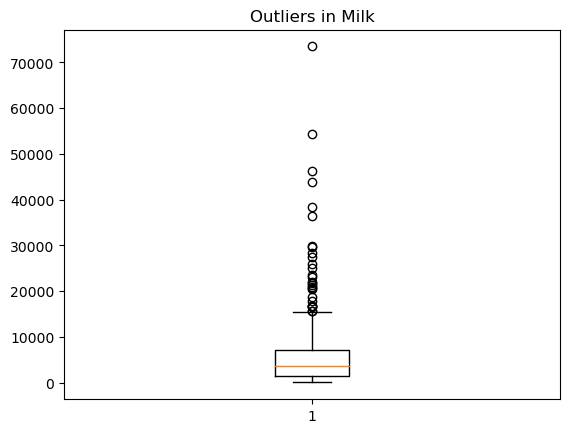

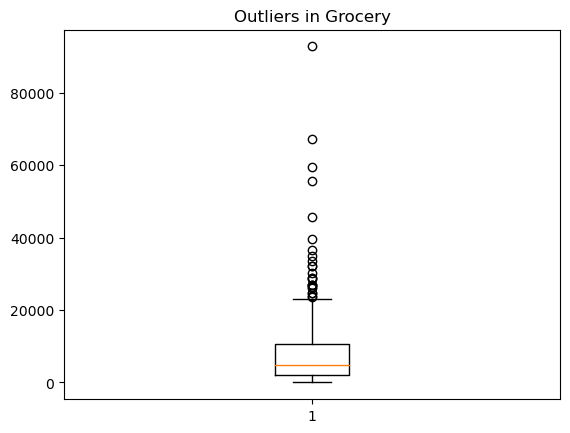

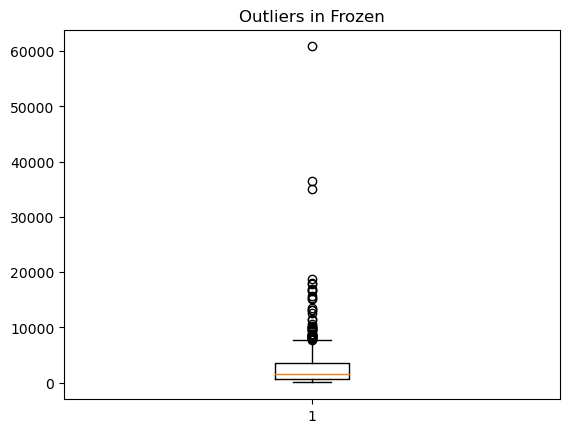

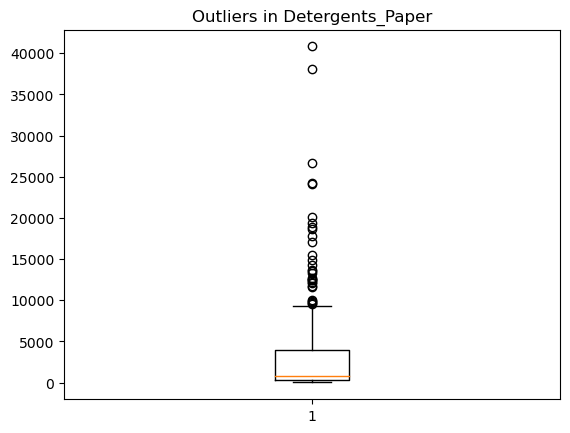

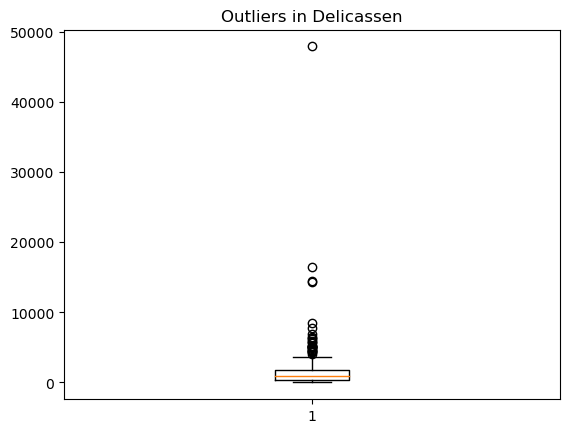

In [9]:
plt.boxplot(data.Fresh)
plt.title('Outliers in Fresh')
plt.show()

plt.boxplot(data.Milk)
plt.title('Outliers in Milk')
plt.show()

plt.boxplot(data.Grocery)
plt.title('Outliers in Grocery')
plt.show()

plt.boxplot(data.Frozen)
plt.title('Outliers in Frozen')
plt.show()

plt.boxplot(data.Detergents_Paper)
plt.title('Outliers in Detergents_Paper')
plt.show()

plt.boxplot(data.Delicassen)
plt.title('Outliers in Delicassen')
plt.show()

In [10]:
# Handling these outliers by

def impute(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1
    
    up_lim = q3 + 1.5 * iqr
    low_lim = q1 - 1.5 * iqr
    
    print("IQR = ",iqr, " Upper limit = ",up_lim, " Lower limit = ",low_lim)
    
    return column.apply(lambda x: up_lim if x > up_lim else(low_lim if x < low_lim else x))

In [11]:
data.Fresh = impute(data['Fresh'])

data.Milk = impute(data['Milk'])

data.Grocery = impute(data['Grocery'])

data.Frozen = impute(data['Frozen'])

data.Detergents_Paper = impute(data['Detergents_Paper'])

data.Delicassen = impute(data['Delicassen'])

IQR =  13806.0  Upper limit =  37642.75  Lower limit =  -17581.25
IQR =  5657.25  Upper limit =  15676.125  Lower limit =  -6952.875
IQR =  8502.75  Upper limit =  23409.875  Lower limit =  -10601.125
IQR =  2812.0  Upper limit =  7772.25  Lower limit =  -3475.75
IQR =  3665.25  Upper limit =  9419.875  Lower limit =  -5241.125
IQR =  1412.0  Upper limit =  3938.25  Lower limit =  -1709.75


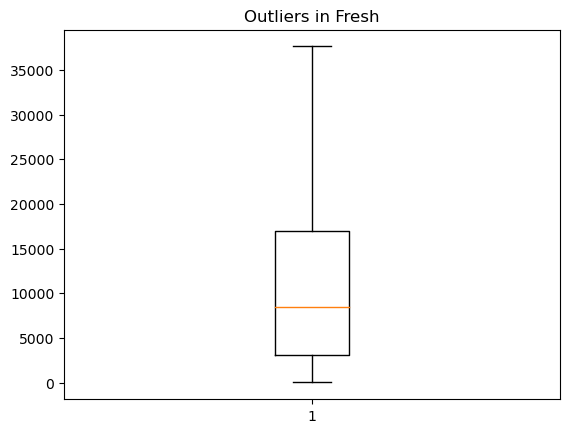

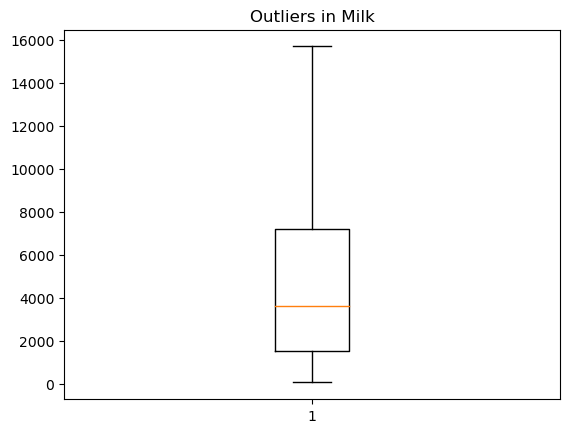

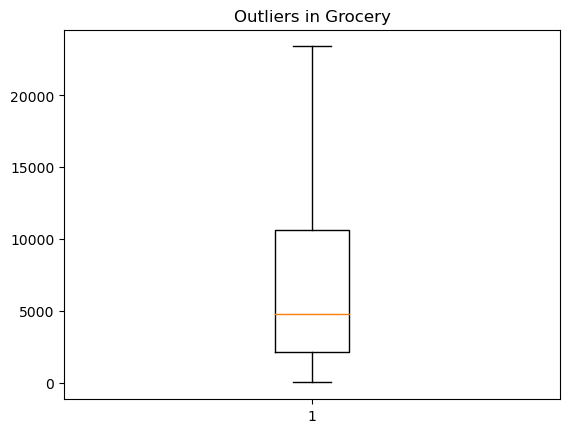

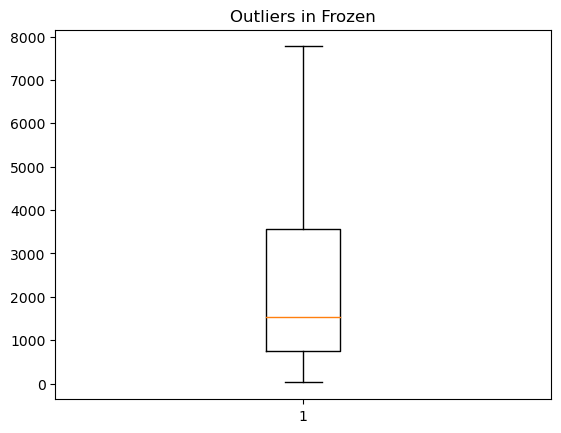

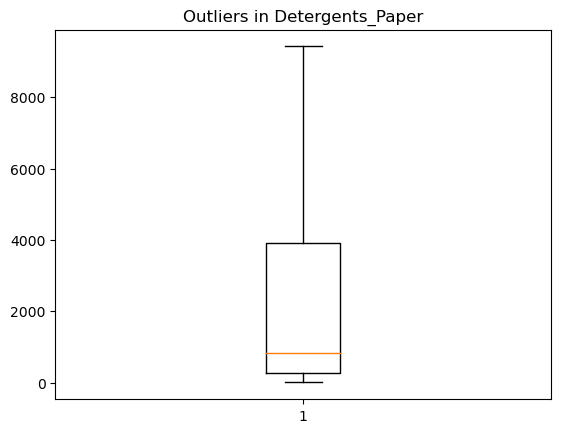

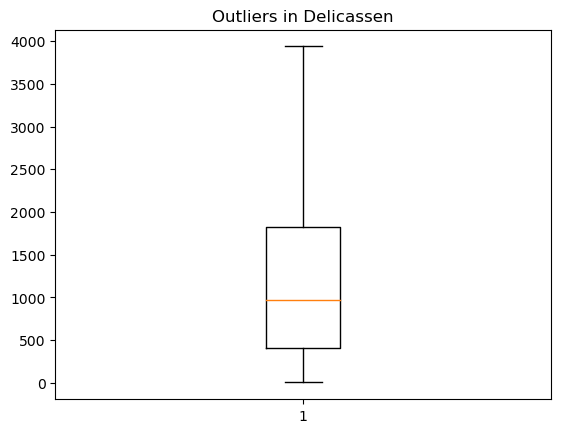

In [12]:
plt.boxplot(data.Fresh)
plt.title('Outliers in Fresh')
plt.show()

plt.boxplot(data.Milk)
plt.title('Outliers in Milk')
plt.show()

plt.boxplot(data.Grocery)
plt.title('Outliers in Grocery')
plt.show()

plt.boxplot(data.Frozen)
plt.title('Outliers in Frozen')
plt.show()

plt.boxplot(data.Detergents_Paper)
plt.title('Outliers in Detergents_Paper')
plt.show()

plt.boxplot(data.Delicassen)
plt.title('Outliers in Delicassen')
plt.show()

In [13]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
x_scaled = sc.fit_transform(x)

# Trying out different clustering models in this dataset and finding the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
# Trying KMeans Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
# trying different no of clusters

kmeans_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, init = 'k-means++')
    kmeans.fit(x_scaled)
    kmeans_scores.append(silhouette_score(x_scaled, kmeans.labels_))
    
kmeans_scores

[0.5909041986285453,
 0.33968745809017253,
 0.34847138657014315,
 0.3690403826812808,
 0.35822425172820815,
 0.3351071341182969,
 0.31445145620899934,
 0.30475553322993926,
 0.3100139696727261]

In [19]:
# Find the optimum number of clusters for KMeans

optimal_kmeans_clusters = np.argmax(kmeans_scores) + 2 

In [20]:
# Creating KMeans model with the optimum number of clusters

kmeans_optimal = KMeans(n_clusters=optimal_kmeans_clusters, n_init = 10)
kmeans_optimal.fit(x_scaled)
kmeans_labels = kmeans_optimal.labels_

print("\nOptimal number of clusters for KMeans:", optimal_kmeans_clusters)
kmeans_labels


Optimal number of clusters for KMeans: 2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# Trying Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
  # trying different numbers of clusters

agg_scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(x_scaled)
    agg_scores.append(silhouette_score(x_scaled, agg.labels_))
    
agg_scores

[0.7924572758342273,
 0.2646091480214908,
 0.2670148241989557,
 0.23988371669170097,
 0.23424990872738188,
 0.24405686464597856,
 0.2520384687343341,
 0.27202620570114383,
 0.27954261064916225]

In [24]:
# Find the optimum number of clusters for Agglomerative Clustering

optimal_agg_clusters = np.argmax(agg_scores) + 2

In [25]:
# Creating Agglomerative Clustering model with the optimum number of clusters

agg_optimal = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
agg_optimal.fit(x_scaled)
agg_labels = agg_optimal.labels_

print("Optimal number of clusters for Agglomerative Clustering:", optimal_agg_clusters)
agg_labels

Optimal number of clusters for Agglomerative Clustering: 2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Perform DBSCAN clustering

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_scaled)
dbscan_labels = dbscan.labels_

In [28]:
dbscan_labels

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

# Perform PCA for dimensionality reduction

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [31]:
x_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

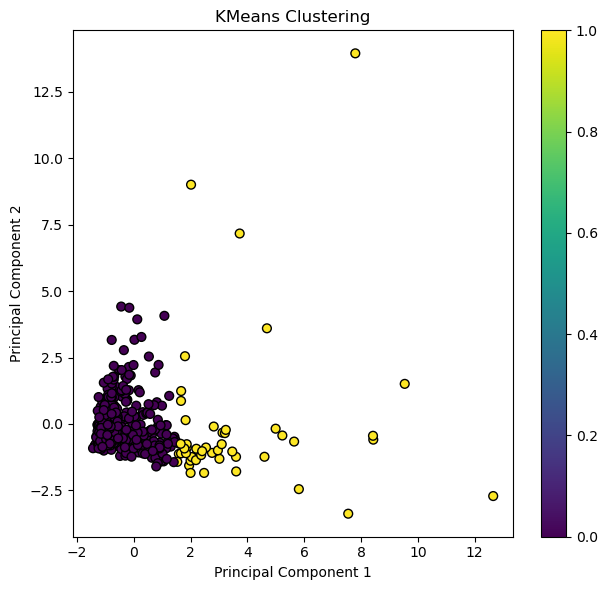

In [32]:
# Plotting the clusters obtained from KMeans

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

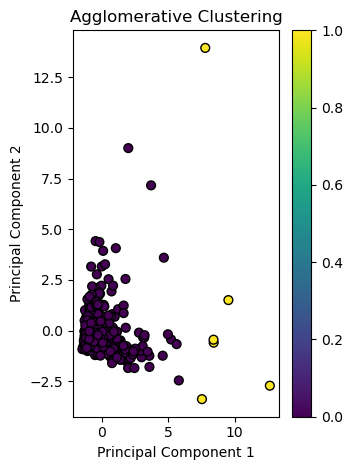

In [33]:
# Plotting the clusters obtained from Agglomerative Clustering

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agg_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()